In [13]:
# libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
#load the dataset
df_patients = pd.read_csv("diabetes.csv")
df_patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#handling missing values
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for columns in columns_to_replace:
    df_patients[columns] = df_patients[columns].replace(0, np.nan)
    df_patients[columns].fillna(df_patients[columns].median(), inplace = True)

C:\Users\veena\AppData\Local\Temp\ipykernel_6512\1869287266.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_patients[columns].fillna(df_patients[columns].median(), inplace = True)


In [7]:
# drop the columns of outcome
x = df_patients.drop(columns = ["Outcome"])
y = df_patients["Outcome"]

In [8]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 43, stratify= y )

In [9]:
#standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# train model
model = RandomForestClassifier(n_estimators= 100, random_state= 41)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=41)

In [11]:
#make predictions
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
# evalute the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7727
classification report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.73      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



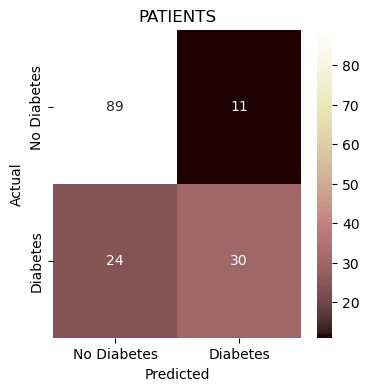

In [17]:
#display
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt= "d", cmap= "pink", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("PATIENTS")
plt.show()